In [ ]:
"""
this file will visualize reconstructed images from compressed tokens in flextok.
reconstructed images are stored in separate folders based on the number of tokens used for reconstruction.
e.g. for token count 1: /BS/data_mani_compress/work/thesis/imagenet_reconstructed/reconst_1
"""

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))   # one level up from notebook/
from data.utils.dataloaders import get_imagenet_dataloader
import numpy as np
import torch
from PIL import Image
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt


/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def denormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406], device=img_tensor.device).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225], device=img_tensor.device).view(3, 1, 1)
    return img_tensor * std + mean

In [3]:
imagenet = get_imagenet_dataloader(split="val_categorized", batch_size=4)
imagenet_reconst_1 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_1', split="", batch_size=4)
imagenet_reconst_2 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_2', split="", batch_size=4)
imagenet_reconst_4 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_4', split="", batch_size=4)
imagenet_reconst_8 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_8', split="", batch_size=4)
imagenet_reconst_16 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_16', split="", batch_size=4)
imagenet_reconst_32 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_32', split="", batch_size=4)
imagenet_reconst_64 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_64', split="", batch_size=4)
imagenet_reconst_128 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_128', split="", batch_size=4)
imagenet_reconst_256 = get_imagenet_dataloader(root='/BS/data_mani_compress/work/thesis/imagenet_reconstructed_APC_true/val_categorized/reconst_256', split="", batch_size=4)


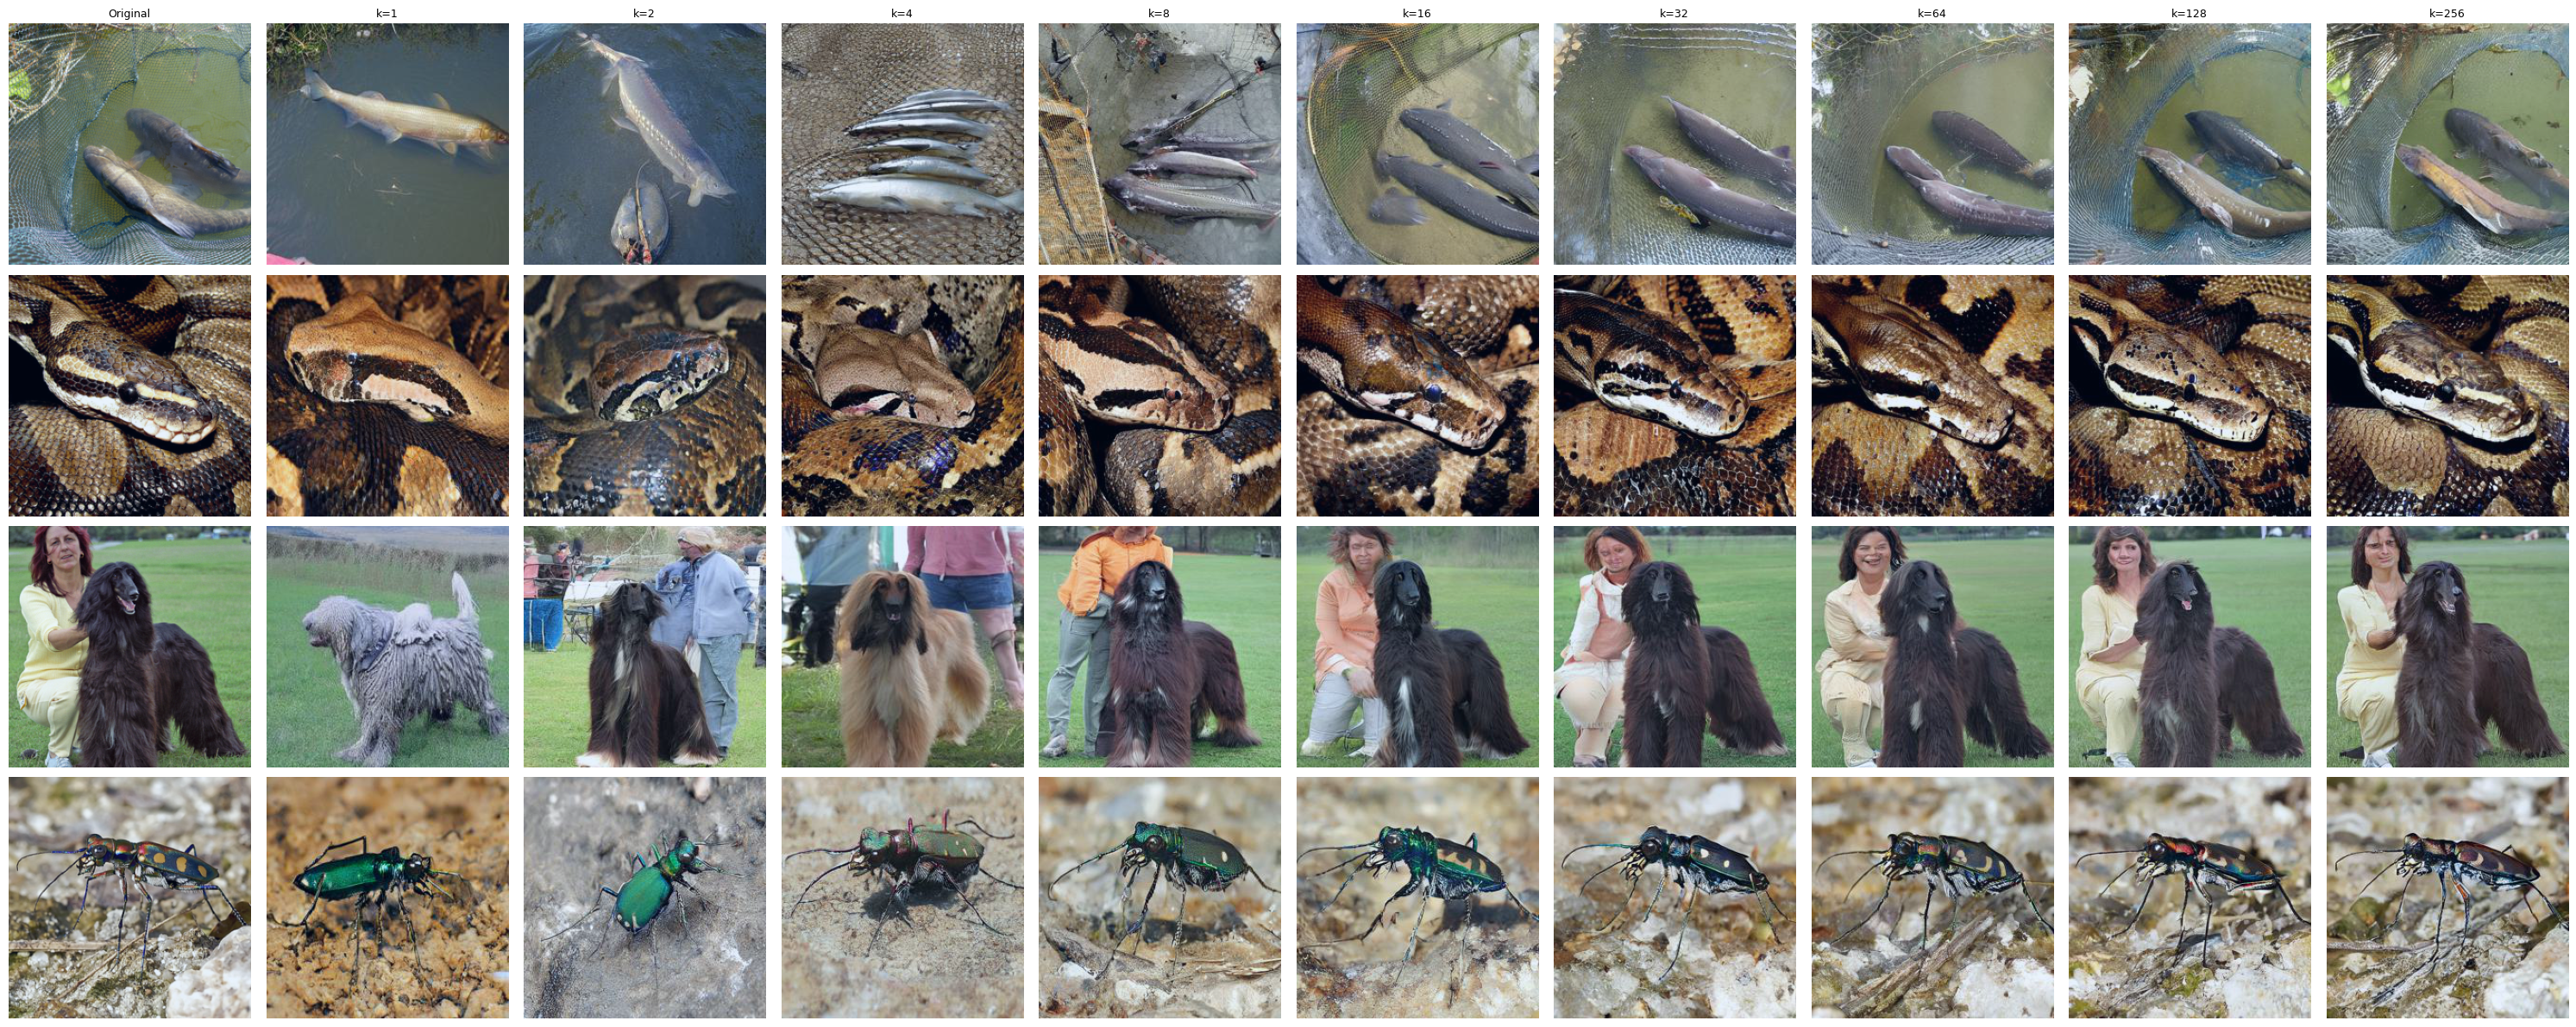

In [5]:
# list of image indices you want to visualize
img_indices = [0, 3000, 8000, 15000]  # 🔹 change this list as you like

# dataloaders
dataloaders = {
    "Original": imagenet,
    "k=1": imagenet_reconst_1,
    "k=2": imagenet_reconst_2,
    "k=4": imagenet_reconst_4,
    "k=8": imagenet_reconst_8,
    "k=16": imagenet_reconst_16,
    "k=32": imagenet_reconst_32,
    "k=64": imagenet_reconst_64,
    "k=128": imagenet_reconst_128,
    "k=256": imagenet_reconst_256,
}

# helper: convert tensor to numpy
def to_numpy(img_tensor):
    if torch.is_tensor(img_tensor):
        img = img_tensor.detach().permute(1, 2, 0).cpu().numpy()
        img = (img - img.min()) / (img.max() - img.min())
        return img
    return img_tensor

# visualization
num_k = len(dataloaders)
num_imgs = len(img_indices)

plt.figure(figsize=(3 * num_k, 3 * num_imgs))

for row_idx, img_idx in enumerate(img_indices):
    for col_idx, (label, loader) in enumerate(dataloaders.items()):
        img_tensor, _ = loader.dataset[img_idx]
        img = to_numpy(img_tensor)

        ax = plt.subplot(num_imgs, num_k, row_idx * num_k + col_idx + 1)
        ax.imshow(img)
        ax.set_title(label if row_idx == 0 else "", fontsize=9)
        ax.axis("off")

plt.tight_layout()
plt.show()